### 1. 下载数据集

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


输入数据： [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据打印shape： (55000, 784)


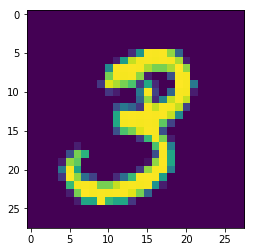

输入数据打shape: (10000, 784)
输入数据打shape: (5000, 784)


In [2]:
print('输入数据：',mnist.train.images)
print('输入数据打印shape：',mnist.train.images.shape)
import pylab
im = mnist.train.images[1]
im = im.reshape(-1, 28)
pylab.imshow(im)
pylab.show()
print ('输入数据打shape:',mnist.test.images.shape)
print ('输入数据打shape:',mnist.validation.images.shape)

### 2. 分析图片特点

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import pylab

tf.reset_default_graph()
# 定义占位符
x = tf.placeholder(tf.float32, [None, 784]) # MNIST数据集的维度28x28=784
y = tf.placeholder(tf.float32, [None, 10]) # 数字0-9，共10个类别

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### 3. 构建模型

In [4]:
# 初始化模型权重
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))

# softmax分类
pred = tf.nn.softmax(tf.matmul(x, W) + b)

# 损失函数
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# 定义参数
learning_rate = 0.01
# 使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


### 4. 训练模型

In [8]:
training_epochs = 25
batch_size = 100
display_step = 1
saver = tf.train.Saver()
model_path = "H:/tensorflow_projects/chap5/mnist_model.ckpt"

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())# Initializing OP

    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 遍历全部数据集
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # 显示训练中的详细信息
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print( " Finished!")

# 测试 model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
# Save model weights to disk
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)

Epoch: 0001 cost= 8.528780973
Epoch: 0002 cost= 4.351987058
Epoch: 0003 cost= 3.044533993
Epoch: 0004 cost= 2.405865938
Epoch: 0005 cost= 2.023756936
Epoch: 0006 cost= 1.771609710
Epoch: 0007 cost= 1.594264874
Epoch: 0008 cost= 1.463273387
Epoch: 0009 cost= 1.362599298
Epoch: 0010 cost= 1.283132398
Epoch: 0011 cost= 1.218332462
Epoch: 0012 cost= 1.164574228
Epoch: 0013 cost= 1.118905594
Epoch: 0014 cost= 1.079640089
Epoch: 0015 cost= 1.045503370
Epoch: 0016 cost= 1.015250035
Epoch: 0017 cost= 0.988325027
Epoch: 0018 cost= 0.963962568
Epoch: 0019 cost= 0.942083137
Epoch: 0020 cost= 0.922068430
Epoch: 0021 cost= 0.903581946
Epoch: 0022 cost= 0.886608397
Epoch: 0023 cost= 0.870939313
Epoch: 0024 cost= 0.856314616
Epoch: 0025 cost= 0.842578177
 Finished!
Accuracy: 0.825
Model saved in file: H:/tensorflow_projects/chap5/mnist_model.ckpt


### 5. 测试模型

In [6]:
# 测试 model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

IndentationError: unexpected indent (<ipython-input-6-2335d5094d57>, line 2)

### 6. 保存模型

In [ ]:
    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)

In [ ]:
saver = tf.train.Saver()

### 7. 读取模型

Starting 2nd session...
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from H:/tensorflow_projects/chap5/mnist_model.ckpt
Accuracy: 0.825
[0 8] [[9.9999976e-01 4.6237684e-18 2.0244670e-08 4.7625484e-08 7.0704164e-18
  2.7070349e-10 9.5091435e-12 6.9175507e-17 9.4598128e-08 7.1266972e-15]
 [5.7434350e-05 3.0411970e-02 1.3331110e-02 1.6055863e-01 1.1928177e-03
  2.4296941e-02 9.0290455e-04 1.7760798e-05 7.6825178e-01 9.7868522e-04]] [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


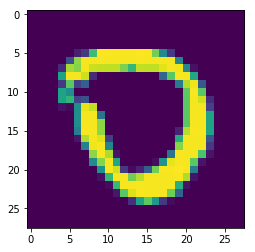

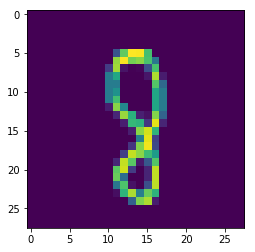

In [9]:
#读取模型
print("Starting 2nd session...")
with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    # Restore model weights from previously saved model
    saver.restore(sess, model_path)
    
     # 测试 model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
    output = tf.argmax(pred, 1)
    batch_xs, batch_ys = mnist.train.next_batch(2)
    outputval,predv = sess.run([output,pred], feed_dict={x: batch_xs})
    print(outputval,predv,batch_ys)

    im = batch_xs[0]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[1]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()